### kaggle wine

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine =pd.read_csv('../03.분류/data/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# wine['target'] = wine.quality.apply(lambda x: 1 if x >= 6 else 0)
# wine.head()

In [5]:
X =wine.iloc[:,:-1].values

In [6]:
wine_std =StandardScaler().fit_transform(X)

pca =PCA(2)
wine_pca =pca.fit_transform(wine_std)

c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\

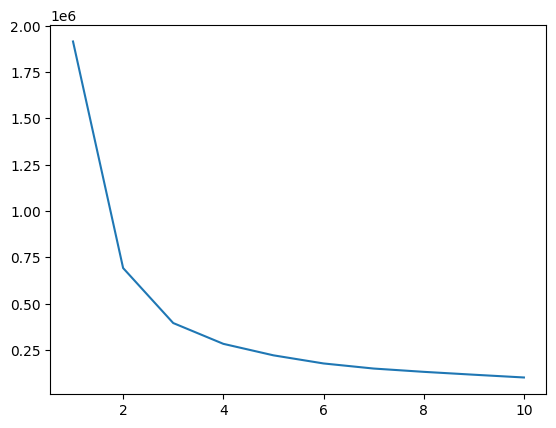

In [7]:
#최적의 K값 찾기
from sklearn.cluster import KMeans
inertia_list =[]
for i in range(1,11):
    kmeans =KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)   # 각 지점으로부터 클러스터의 중심까지의 거리의 제곱함
plt.plot(range(1,11),inertia_list)
plt.show()


In [8]:
K =4 # 최적의 K

In [9]:
#fit() 메서드는 모델을 학습시키는데 사용되고, 
#fit_predict() 메서드는 학습된 모델을 사용하여 데이터의 군집 레이블을 예측하는데 사용됩니다.
from sklearn.cluster import KMeans
kmeans =KMeans(n_clusters=2,random_state=2023, n_init='auto')
kmeans.fit_predict(wine_std)

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
kmeans.labels_


array([0, 0, 0, ..., 0, 0, 0])

In [11]:
import numpy as np
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([958, 641], dtype=int64))

In [12]:
df =pd.DataFrame(wine_pca,columns=['PC1','PC2'])
df['target'] =wine.quality
df['cluster']=kmeans.labels_
df.head(54).tail()

,PC1,PC2,target,cluster
49,-0.657853,0.460508,5,0
50,0.588407,-0.550912,5,1
51,-1.561117,-0.539038,6,0
52,-1.521344,-0.722780,6,0
53,0.846394,2.123361,5,1


In [13]:
df.target.value_counts().sort_index()

target
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [14]:
df.groupby(['target','cluster'])[['PC1']].count()

PC1
target cluster     
3      0          7
       1          3
4      0         42
       1         11
5      0        469
       1        212
6      0        371
       1        267
7      0         62
       1        137
8      0          7
       1         11

In [15]:
wine.describe() 
dir(wine)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '

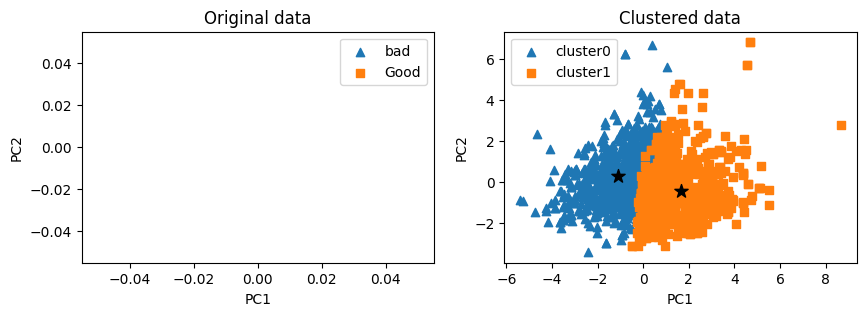

In [16]:
markers = ['^', 's']
my_label=['bad','Good']   
plt.figure(figsize=(10,3))
for k,column in enumerate (['target','cluster']):
    plt.subplot(1,2,k+1)
    for i , marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data, y_data, marker=marker, label=my_label[i])
        else:
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(),y_data.mean(),marker='*',c='black',s=100)

    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    if k == 0:
        plt.title("Original data")
    else:
        plt.title("Clustered data")

plt.show()

In [17]:
from sklearn.metrics import silhouette_samples,silhouette_score

sil_samples =silhouette_samples(wine_std,kmeans.labels_)
df['실루엣 계수'] =sil_samples
df.head()

,PC1,PC2,target,cluster,실루엣 계수
0,-1.619530,0.450950,5,0,0.392464
1,-0.799170,1.856553,5,0,0.307586
2,-0.748479,0.882039,5,0,0.356208
3,2.357673,-0.269976,6,1,0.234043
4,-1.619530,0.450950,5,0,0.392464


In [18]:
# 실루엣 계수의 평균이 실루엣 스코어
df['실루엣 계수'].mean()

0.2068046222150101

In [19]:
df.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.275069
1,0.104781


In [23]:
silhouette_score(wine_std,kmeans.labels_)

0.2068046222150101

c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\

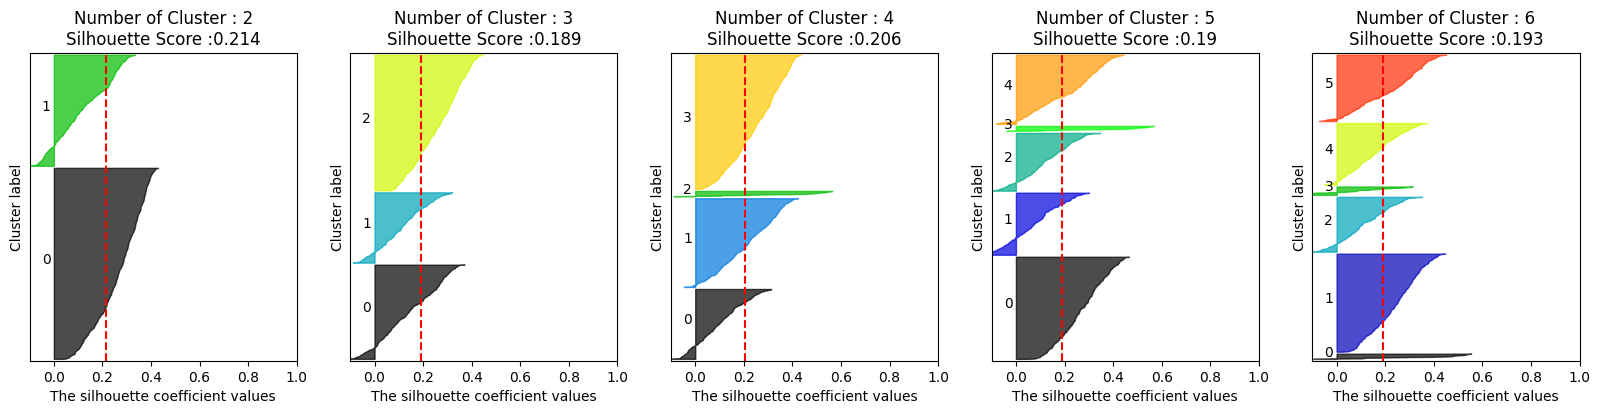

In [24]:
from visualize import visualize_silhouette 
visualize_silhouette([2,3,4,5,6], wine_std)